***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# Nova seção

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [3]:
df = pd.read_csv('dados.csv')


### Visualize o conteúdo do DataFrame

In [4]:
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [5]:
df.max()

UF                    53.000000
Sexo                   1.000000
Idade                 99.000000
Cor                    8.000000
Anos de Estudo        17.000000
Renda             200000.000000
Altura                 2.028497
dtype: float64

In [6]:
classes = [0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [7]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

--> var = pd.cut(x = dados, bins = classes, labels = labels, include_lowest = True)

In [8]:
freq = pd.cut(x = df['Renda'], bins = classes, labels = labels, include_lowest = True)
freq
frequencia = freq.value_counts()
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

--> var = pd.value_counts( pd.cut( x = dados, bins = classes, labels = labels, include_lowest = True ), normalize = True )*100

In [9]:
perc = freq.value_counts(normalize = True)*100
perc

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [10]:
dfq = pd.DataFrame({'Frequência': frequencia, 'Porcentagem': perc})
dfq

,Frequência,Porcentagem
E,49755,64.751432
D,18602,24.208745
C,7241,9.423477
B,822,1.069755
A,420,0.546590


In [11]:
dfq.sort_index(ascending = False, inplace = True)

### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: >

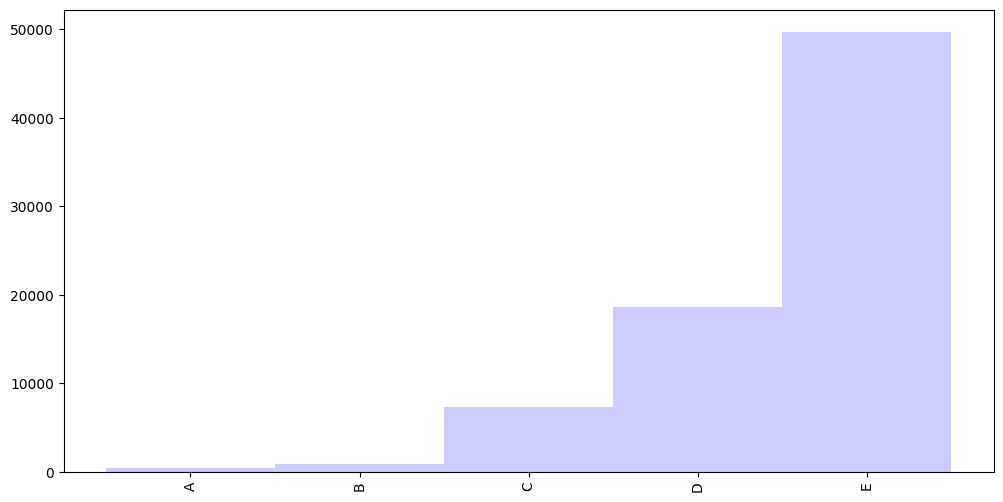

In [12]:
dfq1 = dfq['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(12, 6))
dfq1

> ### Conclusões

A classe E consegue ser quase o dobro do somatório das outras classes


### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

__________________________________________________________________________________

ax = sns.distplot(dataframe[coluna], bins = x)


ax.figure.set_size_inches(x, y)

ax.set_title('título', fontsize=x)

ax.set_xlabel('título', fontsize=x)

para fazer consulta com distplot:
data.query(' coluna + condição ')
nome da coluna sem aspas ou colchetes
pergunta toda dentro de aspas

para fazer consulta com hist:
data.query(' coluna + condição ')['coluna']
nome da coluna sem aspas ou colchetes
pergunta toda dentro de aspas
nome da coluna com aspas e colchetes fora da consulta

__________________________________________________________________________________

<ipython-input-13-b52133d620ad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['Idade'], bins = 20)


<Axes: title={'center': 'Distribuição de Idades'}, xlabel='Idade', ylabel='Density'>

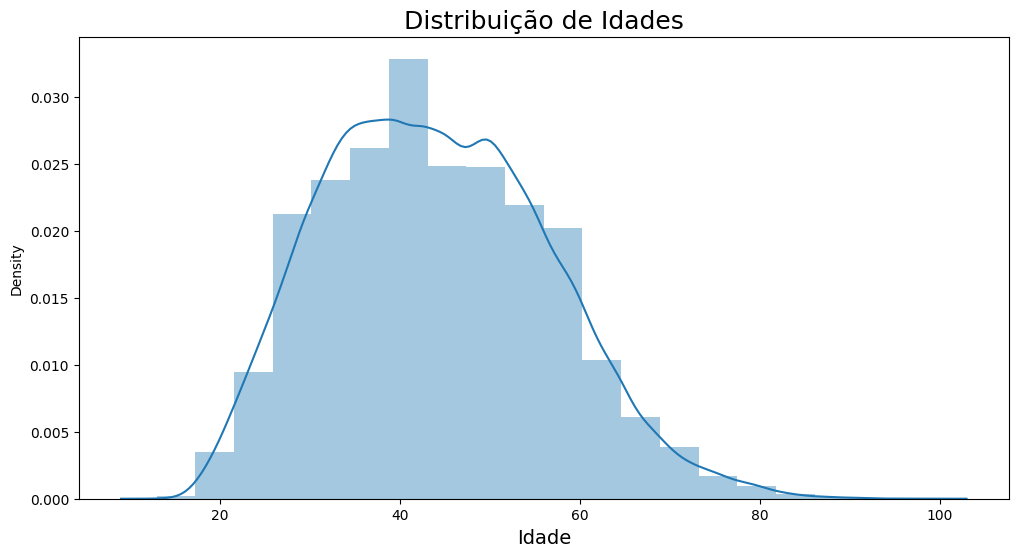

In [13]:
ax = sns.distplot(df['Idade'], bins = 20)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Idades', fontsize = 18)
ax.set_xlabel('Idade', fontsize = 14)
ax

<Axes: title={'center': 'Distribuição de Idades'}, xlabel='Idade'>

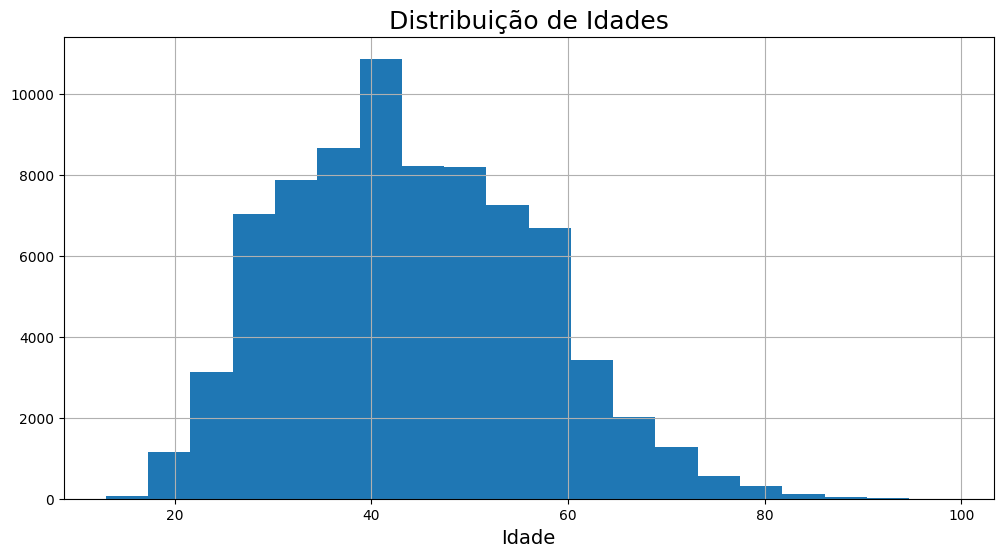

In [14]:
ax = df['Idade'].hist(bins = 20, figsize = (12, 6))
ax.set_title('Distribuição de Idades', fontsize = 18)
ax.set_xlabel('Idade', fontsize = 14)
ax

<ipython-input-15-d4e6c19261d5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.query('Renda < 20000'), bins = 20)


<Axes: title={'center': 'Distribuição de Renda'}, xlabel='Renda', ylabel='Density'>

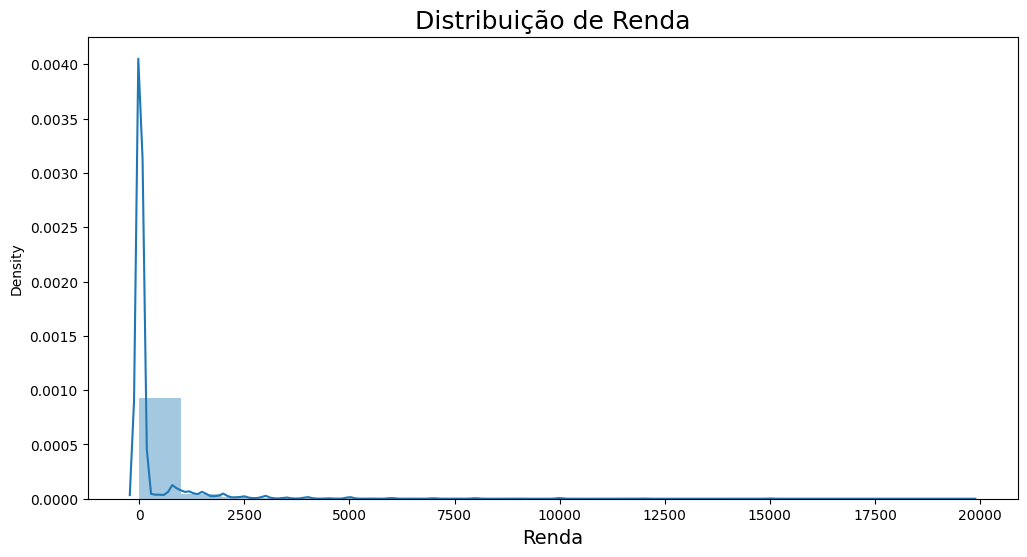

In [15]:
ax = sns.distplot(df.query('Renda < 20000'), bins = 20)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Renda', fontsize = 18)
ax.set_xlabel('Renda', fontsize = 14)
ax

<Axes: title={'center': 'Distribuição de Renda'}, xlabel='Renda'>

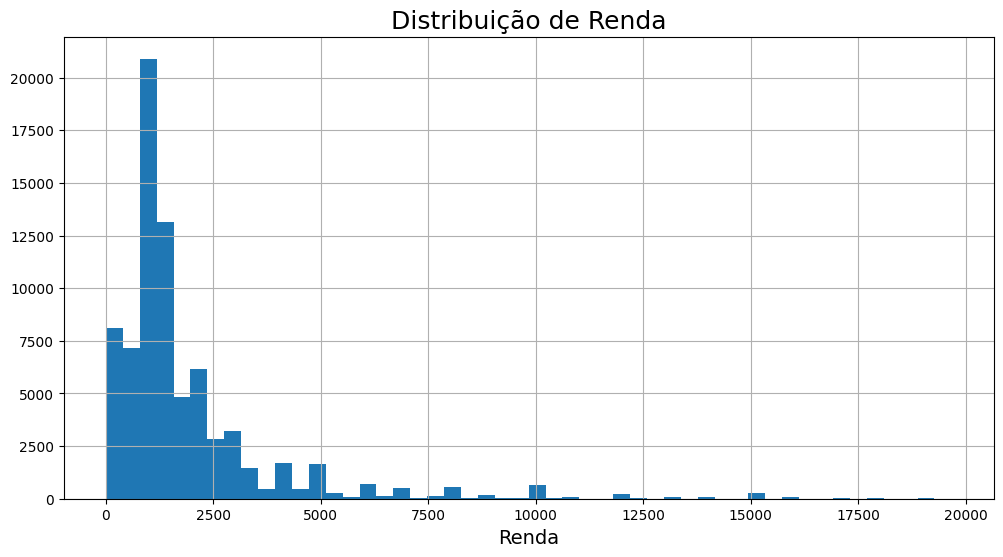

In [16]:
ax = df.query(' Renda < 20000')['Renda'].hist(bins = 50, figsize = (12, 6))
ax.set_title('Distribuição de Renda', fontsize = 18)
ax.set_xlabel('Renda', fontsize = 14)
ax

<ipython-input-17-17353d8de6ae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['Altura'], bins = 50)


<Axes: title={'center': 'Distribuição de Altura'}, xlabel='Altura', ylabel='Density'>

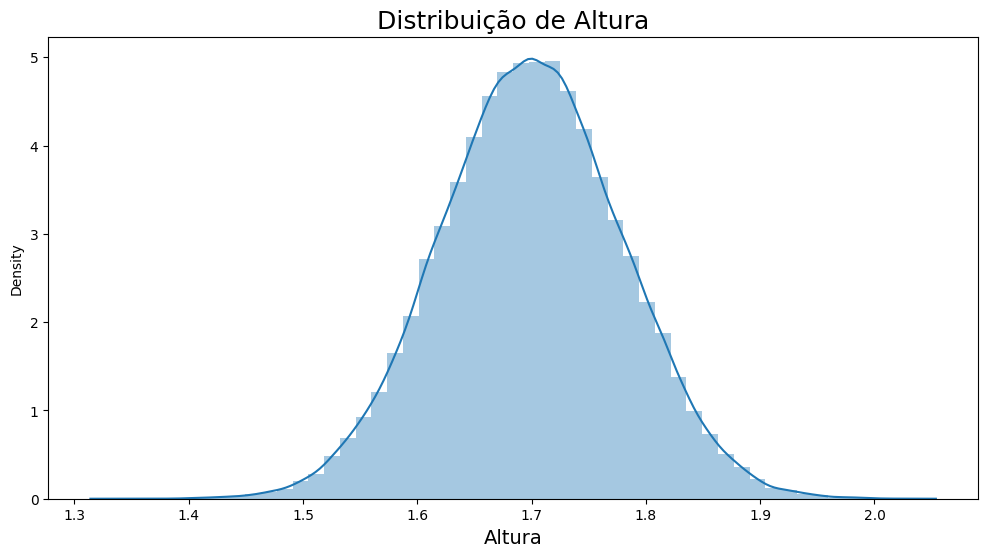

In [17]:
ax = sns.distplot(df['Altura'], bins = 50)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Altura', fontsize = 18)
ax.set_xlabel('Altura', fontsize = 14)
ax

<Axes: title={'center': 'Distribuição de Altura'}, xlabel='Altura'>

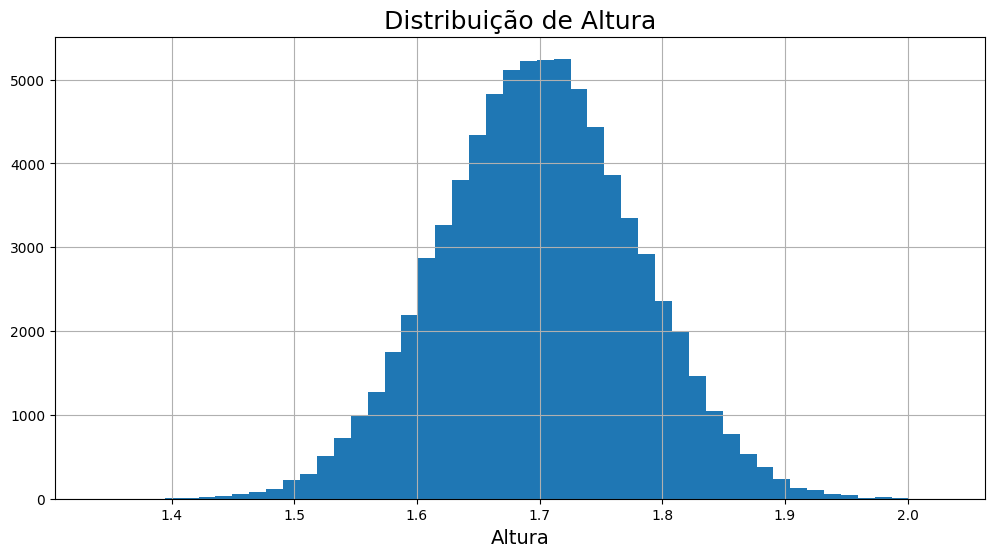

In [18]:
ax = df['Altura'].hist(bins = 50, figsize = (12, 6))
ax.set_title('Distribuição de Altura', fontsize = 18)
ax.set_xlabel('Altura', fontsize = 14)
ax

> ### Conclusões

Escreva suas conclusões aqui...

Idade: É possível perceber um padrão simétrico, tendendo à uma assimetria à direita

Renda: É possível identificar uma discrepância gigantesca à direita do gráfico, seria necessário revisar tais valores para confirmar que estão corretos. Percebe-se que a maioria da população se encontra nas classes E e D

Altura: Percebe-se um padrão bem simétrico das alturas entre a população, tendo sua mediana na casa do 1,70m

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [19]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

Cruzar colunas frequencia:

df = pd.crosstab(data['coluna'], data['coluna'])

df.rename_axis('título', axis=1)

df.rename(index = dicionário, columns = dicionário, inplace = True)


In [20]:
df2 = pd.crosstab(df['Sexo'], df['Cor'])
df2.rename_axis('Sexo', axis=1)

df2.rename(index = sexo, columns = cor, inplace = True)
df2

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


Cruzar colunas percentual:

df = pd.crosstab(data['coluna'], data['coluna'], normalize = True)*100

df.rename_axis('título', axis=1)

df.rename(index = dicionário, columns = dicionário, inplace = True)


In [21]:
df3 = pd.crosstab(df['Sexo'], df['Cor'], normalize = True)*100
df3.rename_axis('Sexo', axis=1)

df3.rename(index = sexo, columns = cor, inplace = True)
df3 = df3.round(2)
df3

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


> ### Conclusões

Em todas as cores, mais do dobro das casas têm o homem como responsável familiar, exceto nas casa de pessoas pretas, que esse padrão fica pouco abaixo do dobro.

Mais da metade das casas são controladas por homens brancos e pardos. 1/3 das casas são controladas por mulheres pardas e brancas. A terceira grande fatia dessa massa é de homens e mulheres pretas. 

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [22]:
df['Renda'].mean()

2000.3831988547631

### Obtenha a mediana

In [23]:
df['Renda'].median()

1200.0

### Obtenha a moda

In [24]:
df['Renda'].mode()[0]

788

### Obtenha o desvio médio absoluto

In [25]:
df['Renda'].mad()

1526.4951371638058

### Obtenha a variância

In [26]:
df['Renda'].var()

11044906.006217021

### Obtenha o desvio-padrão

In [27]:
df['Renda'].std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [28]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}

df4 = pd.crosstab(df['Cor'], df['Sexo'], aggfunc = ['mean', 'median', 'max'], values = df['Renda'])

titulos = ['Média', 'Mediana', 'Máximo']

df4.rename(index = cor, columns = sexo, inplace=True)
df4.round(2)

mean             median                max         
Sexo     Masculino Feminino Masculino Feminino Masculino Feminino
Cor                                                              
Indígena   1081.71  2464.39     797.5    788.0     10000   120000
Branca     2925.74  2109.87    1700.0   1200.0    200000   100000
Preta      1603.86  1134.60    1200.0    800.0     50000    23000
Amarela    4758.25  3027.34    2800.0   1500.0     50000    20000
Parda      1659.58  1176.76    1200.0    800.0    100000    30000

> ### Conclusões

Avaliando os dados gerais. temos um gráfico assimétrico à direita.

As indígenas mulheres têm renda média maior que 2x a renda do indígena homem. Possuem media semelhante. A maior renda dessa cor é a feminina, sendo 12x maior que o do homem, possivelmente um valor discrepante, conferir posteriormente.

O padrão constatado é do homem ter renda em média 2x maior que as mulheres. Exceto no caso indígena
 



### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [29]:
df5 = pd.crosstab(df['Cor'], df['Sexo'], aggfunc = ('mad', 'var', 'std'), values = df['Renda'])
df5.rename(index = cor, columns = sexo, inplace = True)
df5.round(2)

mad                std                    var              
Sexo     Masculino Feminino Masculino  Feminino    Masculino      Feminino
Cor                                                                       
Indígena    798.91  3007.89   1204.09  11957.50   1449841.13  1.429818e+08
Branca     2261.01  1670.97   4750.79   3251.01  22570023.41  1.056909e+07
Preta       975.60   705.45   1936.31   1349.80   3749293.59  1.821960e+06
Amarela    3709.60  2549.15   5740.82   3731.17  32957069.62  1.392166e+07
Parda      1125.83   811.58   2312.09   1596.23   5345747.15  2.547960e+06

> ### Conclusões

Os menores desvios medios absolutos se encontram nos indígenas masculinos, pretos femininos, pardos femininos e pretos masculinos

As cores pretas e pardas possuem o desvio padrão mais próximo entre os sexos, o desvio padrão dos indígenas mulheres possui uma discrepância( conferir).

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Medidas separatrizes, Sexo x Cor'}, xlabel='Renda', ylabel="{0: 'Indígena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda', 9: 'Sem declaração'}">

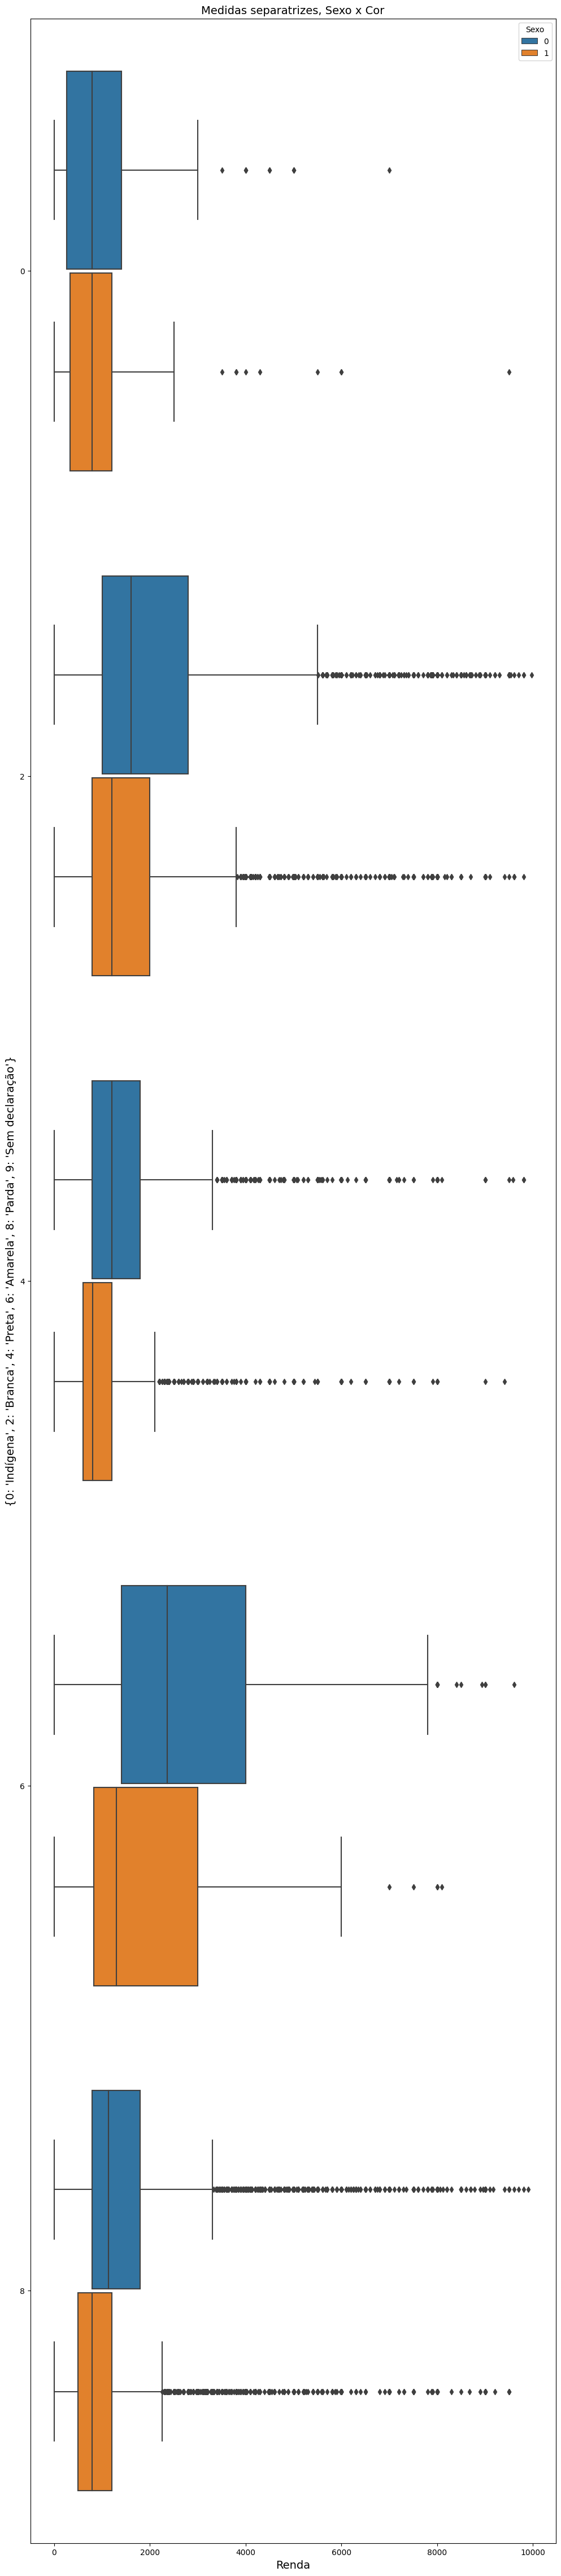

In [30]:
ax = sns.boxplot(x='Renda', y='Cor', hue= 'Sexo', data = df.query('Renda < 10000'), orient= 'h')
ax.figure.set_size_inches(12, 58)
ax.set_title('Medidas separatrizes, Sexo x Cor', fontsize=14)
ax.set_ylabel(cor, fontsize=14)
ax.set_xlabel('Renda', fontsize=14)
ax

> ### Conclusões

O padrão segue sendo a renda masculina maior que a feminina. 

Os indígenas possuem renda mais homogênea

Os amarelos possuem uma disperção salarial maior



# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [31]:
from scipy import stats

sm = stats.percentileofscore(df['Renda'], 788)
sm.round(2)

24.39

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [32]:
a = [i/100 for i in range(100)]
df7 = df['Renda'].quantile(a)
df7 = pd.DataFrame(df7)
df7


,Renda
0.00,0.0
0.01,0.0
0.02,0.0
0.03,0.0
0.04,50.0
...,...
0.95,6000.0
0.96,7000.0
0.97,8000.0
0.98,10000.0


In [33]:
df7.iloc[99][0]

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [34]:
df8 = pd.crosstab(df['Anos de Estudo'], df['Sexo'], aggfunc= ['mean', 'median', 'max', 'std'], values = df['Renda'])
df8.round(2)

mean          median           max              std  \
Sexo                  0        1      0     1       0       1        0   
Anos de Estudo                                                           
1                799.49   516.20    700   390   30000   10000  1023.90   
2                895.63   492.77    788   400   30000    2000  1331.95   
3                931.18   529.91    788   450   40000    4000  1435.17   
4               1109.20   546.85    800   500   80000    3500  2143.80   
5               1302.33   704.28   1000   788   50000   10000  1419.82   
6               1338.65   781.39   1045   788   35000    8000  1484.65   
7               1448.88   833.73   1200   788   25000    6000  1476.63   
8               1465.50   830.75   1200   788   40000    9000  1419.71   
9               1639.40   933.62   1300   800   30000   18000  1515.58   
10              1508.04   868.02   1200   788   60000   20000  2137.66   
11              1731.27   925.92   1218   800   45000    6000  2078.61   
12              2117.06  1286.79   1500  1000  200000  100000  2676.54   
13              2470.33  1682.31   1800  1200   30000  120000  2268.08   
14              3195.10  1911.73   2400  1300   25000   20000  2797.12   
15              3706.62  2226.46   2500  1600   50000   20000  3987.21   
16              6134.28  3899.51   4000  2800  200000  100000  7447.61   
17              1295.76   798.17   1200   788    7000    3000   979.65   

                         
Sexo                  1  
Anos de Estudo           
1                639.31  
2                425.29  
3                498.23  
4                424.12  
5                629.55  
6                635.78  
7                574.55  
8                602.04  
9                896.78  
10               973.22  
11               620.61  
12              1819.04  
13              4851.83  
14              2053.79  
15              2064.08  
16              4212.77  
17               459.99

as maiores rendas estão entre quem estudou acima de 12 anos



### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='Renda', ylabel='Anos de Estudo'>

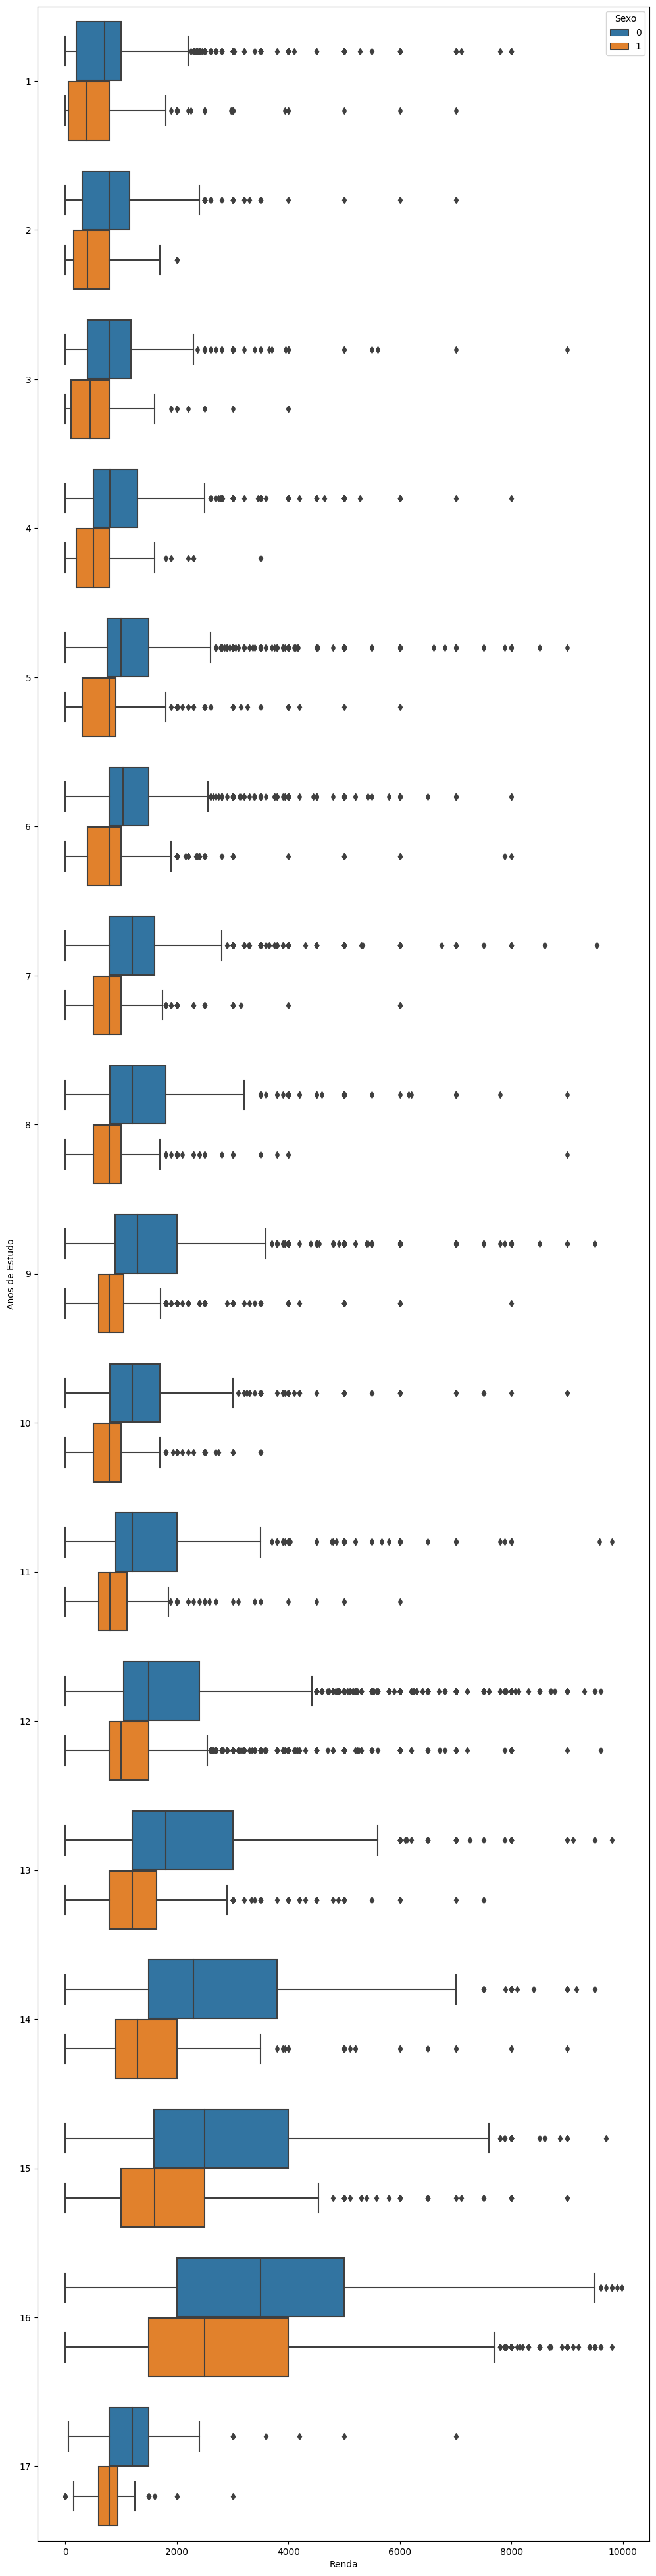

In [41]:
ax = sns.boxplot(x= 'Renda', y= 'Anos de Estudo', hue= 'Sexo', data= df.query('Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(12, 50)
ax

> ### Conclusões

Percebe-se um padrão entre todas as etnias que a mediana feminina encontra-se próximo ao Q1 masculino e o Q3 feminino próximo à mediana masculina. 
Pessoas com 1 ano de estudo são as que menos possuem diferença salarial.

A maior diferença salarial acontece na faixa de 13 e 16 anos de estudo, onde os salários são os maiores e as mulheres não alcançam esses valores. A maior dispersão de renda também acontece nessa faixa. Apenas com 16 anos de estudo, as mulheres têm o Q3 ultrapassando a mediana masculina

Entre a faixa de 1 a 11 anos de estudo, o salário feminino mantêm o Q3 muito semelhante. Apenas na faixa dos 14 aos 16 anos de estudo o salário feminino tem um aumento considerável

Os maiores salários acontecem nas faixas 15 e 16 anos.

Por alguma razão, a faixa de 17 anos têm um decrescimo inexplicável na renda independente de sexo, comparando-se ao grupo que estudou 4 anos





<Axes: xlabel='Renda', ylabel='Anos de Estudo'>

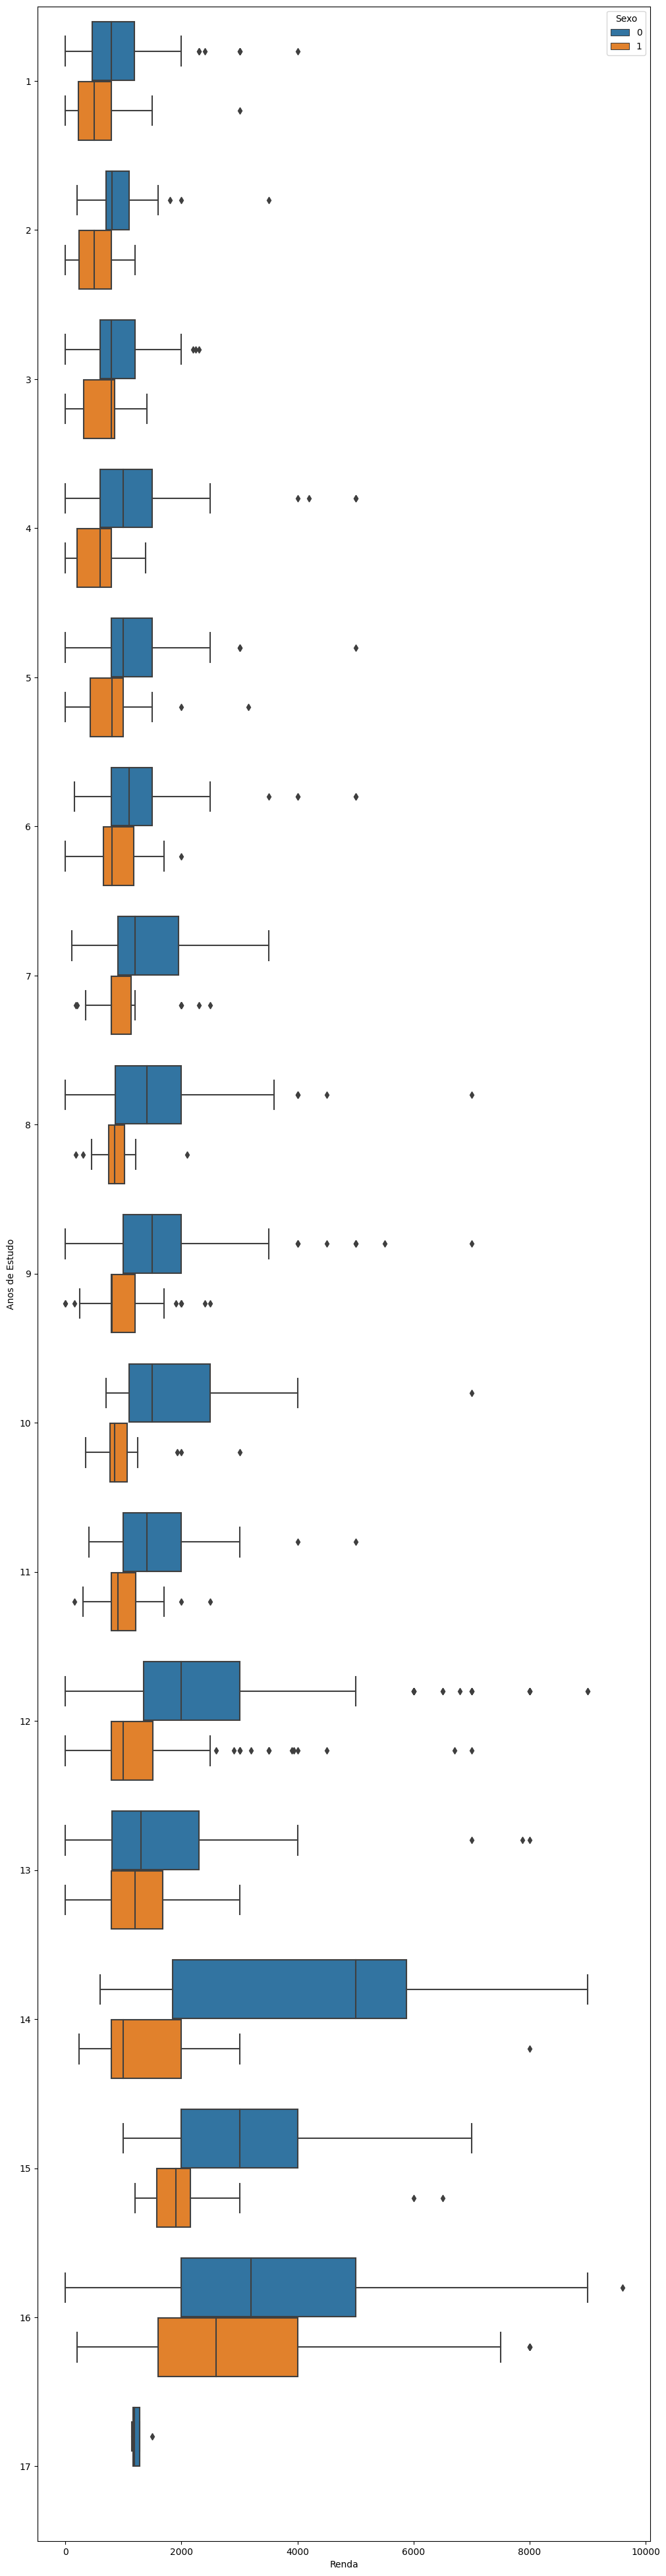

In [43]:
ax = sns.boxplot(x= 'Renda', y= 'Anos de Estudo', hue= 'Sexo', data= df.query('Renda < 10000 and Idade ==50'), orient = 'h')

ax.figure.set_size_inches(12, 50)
ax

Na faixa dos 40 anos, percebe-se que as pessoas com mais tempo de estudo são mais bem remuneradas, possivelmente essa valorização deve-se a experiência dos anos de estudo pôsto em prática. Os valores possuem uma grande dispersão, mas mantendo seu Q1 mais à direita no gráfico

Aos 40 anos e com 17 anos de estudo, não se identificou nenhum registro masculino. apenas feminino. O padrão feminino se manteve semelhante ao gráfico geral.

Percebe-se que pode haver uma discrepância nos registros de 17 anos



Aos 50 anos o padrão continua semelhante, porém agora aos 17 anos de estudo existe apenas homens nos registros, uma pequena parcela mantendo o mesmo padrão salarial com menos dispersão 


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [66]:
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

df8 = df.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
df8 = df8.round(2)
df8 = df8.rename(index = uf)
df8

Renda                         
                        mean  median     max      std
UF                                                   
Rondônia             1789.76  1200.0   50000  2406.16
Acre                 1506.09   900.0   30000  2276.23
Amazonas             1445.13   900.0   22000  1757.94
Roraima              1783.59  1000.0   20000  2079.66
Pará                 1399.08   850.0   50000  2053.78
Amapá                1861.35  1200.0   15580  2020.69
Tocantins            1771.09  1000.0   60000  2934.59
Maranhão             1019.43   700.0   30000  1887.82
Piauí                1074.55   750.0   40000  2373.36
Ceará                1255.40   789.0   25000  1821.96
Rio Grande do Norte  1344.72   800.0   15500  1651.81
Paraíba              1293.37   788.0   30000  1950.27
Pernambuco           1527.08   900.0   50000  2389.62
Alagoas              1144.55   788.0   11000  1237.86
Sergipe              1109.11   788.0   16000  1479.00
Bahia                1429.65   800.0  200000  3507.92
Minas Gerais         2056.43  1200.0  100000  3584.72
Espírito Santo       2026.38  1274.0  100000  3513.85
Rio de Janeiro       2496.40  1400.0  200000  5214.58
São Paulo            2638.10  1600.0   80000  3503.78
Paraná               2493.87  1500.0  200000  4302.94
Santa Catarina       2470.85  1800.0   80000  3137.65
Rio Grande do Sul    2315.16  1500.0   35000  2913.34
Mato Grosso do Sul   2262.60  1500.0   42000  3031.42
Mato Grosso          2130.65  1500.0   35000  2542.63
Goiás                1994.58  1500.0   30000  2221.93
Distrito Federal     4241.95  2000.0  100000  5550.46

In [100]:
df9 = df.groupby('UF')['Renda']
df9.groups

media = df9.mean().round(2)


mediana = df9.median().round(2)

max = df9.max().round(2)

desvio_padrao = df9.std().round(2)
desvio_padrao.to_frame()




,Renda
UF,
11,2406.16
12,2276.23
13,1757.94
14,2079.66
15,2053.78
16,2020.69
17,2934.59
21,1887.82
22,2373.36


### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<Axes: title={'center': 'Renda X UF'}, xlabel='Renda', ylabel='UFs'>

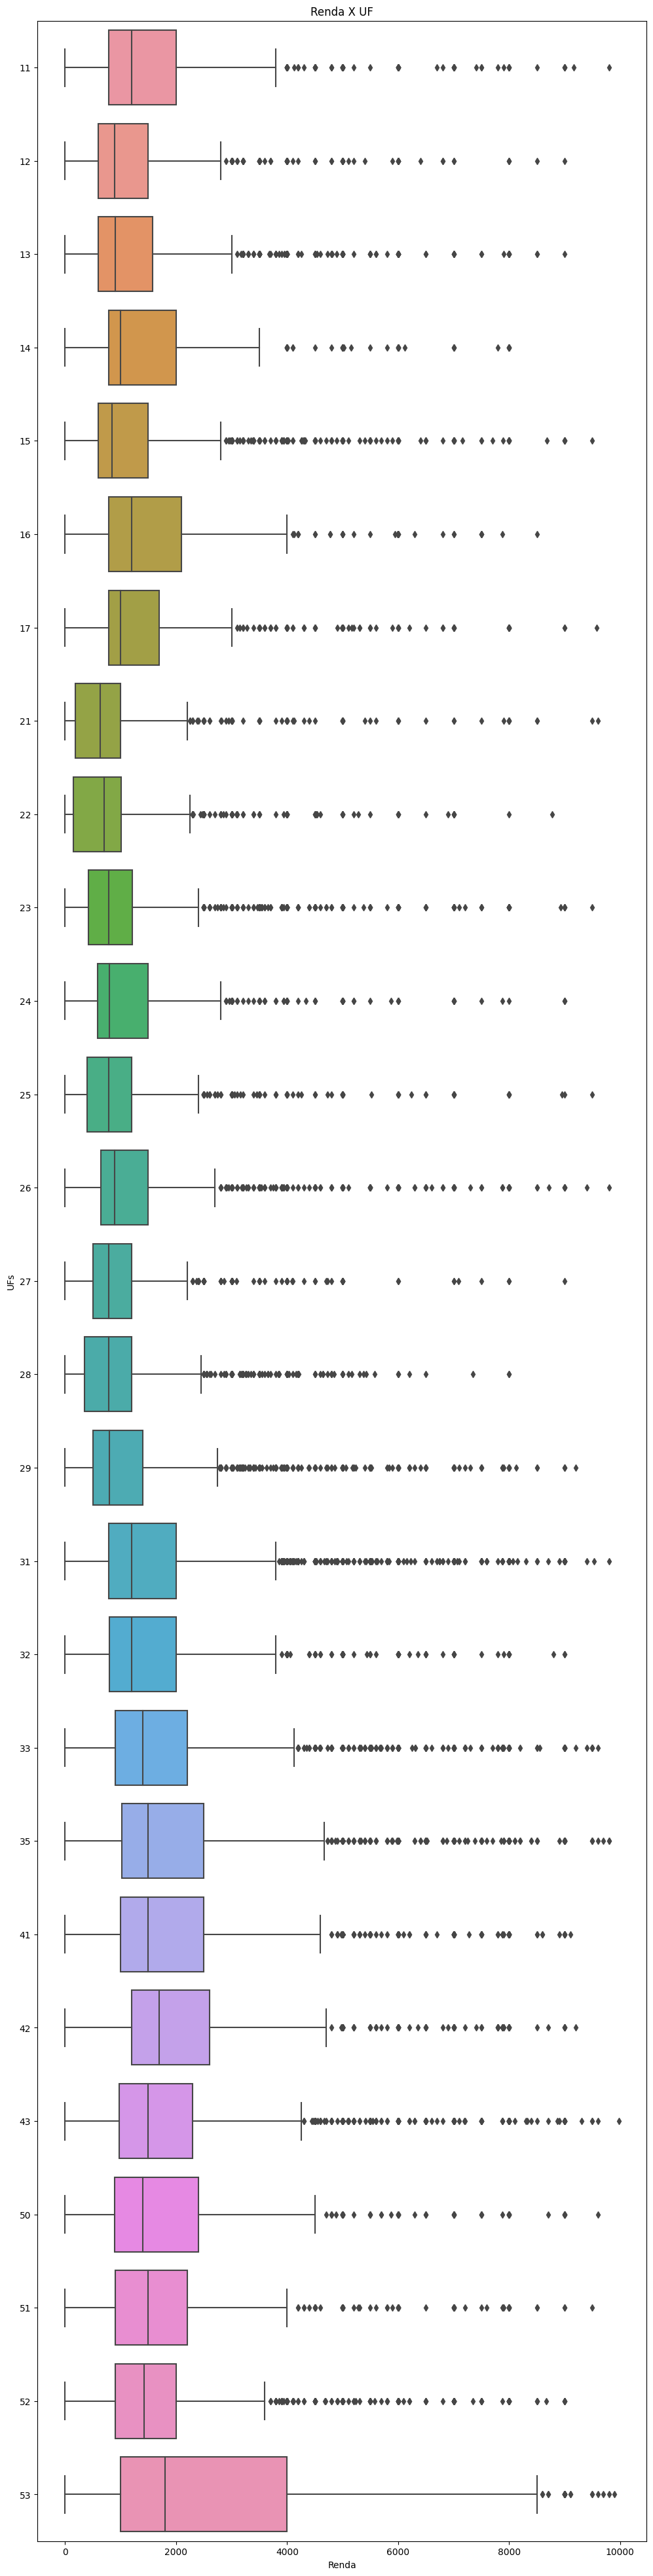

In [102]:
ax = sns.boxplot(x='Renda', y='UF', data= df.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 50)
ax.set_title('Renda X UF')
ax.set_ylabel('UFs')
ax

> ### Conclusões

Pode-se perceber uma grande rentabilidade no estado 53 assim como a maior dispersão entre estados.

Os menores salários estão nos estados 21 e 22

